## HET: Initial Parameter Calculator

Reference:\
[1] Thomas F. Munro-O’Brien, Charles N. Ryan, Performance of a low power Hall effect thruster with several gaseous propellants\
[2] Käthe Dannenmayer, Stéphane Mazouffre, Elementary Scaling Relations for Hall Effect Thrusters\
[3] Lee et al., Scaling Approach for Sub-Kilowatt Hall-Effect Thrusters

In the following procedure we will determine:
1. Requried mass flow rate
2. Diameter d
3. Discharge current
4. Electric power 
5. size of the h
6. The channel length L


### Method 1:
Main Reference: Käthe Dannenmayer, Stéphane Mazouffre, Elementary Scaling Relations for Hall Effect Thrusters

### Assumptions:
1) All quantities are steady in time and uniform in space
2) The electron temperature is unchanging whatever the operating conditions
3) The propellant gas has a uniform and fixed temperature all over the channel, hence a constant propellant velocity
4) The potential energy is fully converted into kinetic energy and
all ions experience the whole potential drop, of which the magnitude
is $U_d$ ($\Delta =0$)
5) Plasma-wall interactions are taken into account through heat
load to the channel walls.
6) The magnetic field is uniform; solely its value at the exit plane is
considered. The channel length $L$ is therefore the length of the region
with magnetic field.
7) Electron transport across the magnetic barrier is considered as
classical: no anomalous transport is accounted for within the region
of strong magnetic field.
8) There are no multiply charged ions in the plasma ($\gamma=\gamma'=1$).
9) A parallel monokinetic ion beam is produced, i.e., the plasma jet
divergence is null ( $\theta_d=1$)


### Criteria
1. Propellant Ionization: Melikov-Morozov criterion: ionization mean free path $\lambda_i$ smaller than channel length $L$ to ensure a sufficient
ionization of the gas, atoms must stay long enough inside the
channel.\
$\lambda_i=\frac{\nu_n T_n}{n_n \sigma_i T_e \nu_e Te}<<L$

2. Electron Confinement-1: The magnetic field strength in a Hall effect thruster is such that electrons are magnetized and ions are not, or at least weakly magnetized.\
$r_Le=\frac{m_e \nu_e T_e}{e B}<<L$


3. Electron Confinement-2: Electron gyroperiod $\tau_{ce}$ in the magnetic barrier must be shorter than the time between two consecutive electron-atom collisions $\tau_{en}$\
$\frac{\tau_{en}}{\tau_{ce}}=\frac{eB}{m_e n_n \sigma_{en} \nu_e}>>1$


In [1]:
import numpy as np


#cofficient list
delta=0     #voltage loss [V]
U_d=1       # discharge voltage [V]
e=1         #elementary charge [C]
m_i=1       #ion mass [kg/s]
theta_d=1   #beam divergence criterion
gamma=1     #correction factors for the presence of multiply charged ions
bar_v_i=np.sqrt((2*e/m_i)*(U_d-delta))   #mean ion flow velocity m/s


#approximate coefficient
C_t1=0.5
C_t2=0.1
C_I=0.1
C_L=0.1

#


In [2]:
'''
# 1. Required parameters
dot_m_n=T/(C_t1*np.sqrt(U_d))     #required mass flow rate

d=np.sqrt(T/(C_t2*np.sqrt(U_d)))  #diameter

I_d=C_I*(d**2)                    #discharge current 

P=I_d*U_d                         #Electric power

A=dot_m_n/(n_n*m_n*nu_n)          #Annular cross section A=pi*h*d

h=A/np.pi*d                       #channel width

L=C_L*lambda_i                    #channel length


Isp=alpha*gamma*theta_d*bar_v_i/g_0   # Isp

eta_a=T**2/(2*dot_m_n*U_d*I_d)        #Anode efficiency


# Only valid if n_n is close to critical density n_n,c
# Verify the number density n_n is close to 1.2x10^19 m^{-3}

# Criterion Checker
'''

'\n# 1. Required parameters\ndot_m_n=T/(C_t1*np.sqrt(U_d))     #required mass flow rate\n\nd=np.sqrt(T/(C_t2*np.sqrt(U_d)))  #diameter\n\nI_d=C_I*(d**2)                    #discharge current \n\nP=I_d*U_d                         #Electric power\n\nA=dot_m_n/(n_n*m_n*nu_n)          #Annular cross section A=pi*h*d\n\nh=A/np.pi*d                       #channel width\n\nL=C_L*lambda_i                    #channel length\n\n\nIsp=alpha*gamma*theta_d*bar_v_i/g_0   # Isp\n\neta_a=T**2/(2*dot_m_n*U_d*I_d)        #Anode efficiency\n\n\n# Only valid if n_n is close to critical density n_n,c\n# Verify the number density n_n is close to 1.2x10^19 m^{-3}\n\n# Criterion Checker\n'

## Another apporach
 Main Reference: Lee et al. Scaling Approach for Sub-Kilowatt Hall-Effect Thrusters



### Method 2: Slope Alternation from empirical prediction
**Equation List**
1. Mass flow rate\
$\dot{m}_a[kg/s]=\pi n_a m_a v_a hd=C_{\dot{m}}hd=0.003hd[m^2]$
2. Channel width\
$h[m]=0.242d[m]$
3. Current\
$I_d\approx \frac{e}{m_a}\alpha \dot{m}_a$
4. Anode discharge power\
$P_d[W]\approx \pi e \alpha n_a v_a U_d hd=C_p U_d d^2=633.0 U_d d^2[V\dot m^2]$
5. Thrust\
$T[N]=\alpha\theta_d \dot{m}_a v_i=\alpha\theta_d \dot{m}_a \sqrt{\frac{2e}{m_i}(U_d-\Delta)}=C_m \dot{m}_a \sqrt{U_d}=892.7\dot{m}_a\sqrt{U_d} [kg/(s*V^{0.5})]$

#### Assumption
The following parameters are assumed to be the same:
1. propellant number density $n_a$ (criteria of [2])
2. ionized propellant mass fraction $\alpha$
3. Anode temperature $T_a$
4. Divergence factor $\theta_d$

In addition, we assume,
1. Anode voltage loss is zero, $\Delta=0$
2. The relation between channel width and diameter remains
3. The line of P, T, and mass flow rate for $O_2$ still pass through the origin 

#### Mass discrepancy between Xe and $O_2$
1. $m_i=m_a$ ion mass: $Xe^+\approx 131.293 [u]$, $O_2^+\approx 32 [u]$
2. $\bar{v_i}$ mean exhaust velocity $\propto \sqrt{\frac{1}{m_i}}$  
3. $v_a$ propellant thermal velocity $v_a=\sqrt{\frac{8K_BT_a}{\pi m_n}}=\propto \sqrt{\frac{1}{m_n}}$

#### Modified coefficient for $O_2$
Mass flow rate: $C_{\dot{m}_{O_2}}=C_{\dot{m}_{Xe}}\cdot \sqrt{\frac{m_{O_2}}{m_{Xe}}}$\
Current: $C_{I_{O_2}}=C_{I_{Xe}}\sqrt{\frac{m_{Xe}}{m_{O_2}}}$\
Anode discharge power: $C_{P_{O_2}}=C_{P_{Xe}}\sqrt{\frac{m_{Xe}}{m_{O_2}}}$\
Thrust: $C_{T_{O_2}}=C_{T_{Xe}}\sqrt{\frac{m_{Xe}}{m_{O_2}}}$


#### Given Parameter
Diameter: $d$\
Discharge voltage: $U_d$

#### Steps
1. calculate the required mass flow rate
2. calculate channel width
3. optain the anode power slope

In [3]:
import numpy as np

# Coefficients (for Xe initially, need to change to O2)
# Required input
d=0.0434  #channel mean diameter [m]
U_d=300   #anode voltage [V]
g_0=9.8   #gravity acceleration [m/s^2]

# mass discrepancy
m_xe=131.293  #xenon mass [u]
m_o2=32       #oxygen mass [u]

C_m_xe=0.003
C_h_xe=0.242
C_P_xe=633.0
C_T_xe=892.7
# Desired Coefficients (obtained from data) 
C_m_o2=C_m_xe*np.sqrt(m_o2/m_xe)  
C_h_o2=C_h_xe
C_P_o2=C_P_xe*np.sqrt(m_xe/m_o2)
C_T_o2=C_T_xe

In [4]:
# Parameters
#For xenon
h_xe=C_h_xe*d
dot_m_xe=C_m_xe*h_xe*d
P_xe=C_P_xe*U_d*(d**2)
T_xe=C_T_xe*dot_m_xe*np.sqrt(U_d)

# corresponding relation
Isp_xe=T_xe/(dot_m_xe*g_0)            # Isp [s]
eta_xe=(T_xe**2)/(2*dot_m_xe*P_xe)     # anode efficiency

print("For Xenon")
print("h[mm]: ",h_xe)
print("Mass flow rate [mg/s]: ", dot_m_xe*1e6)
print("Thrust [mN]: ",T_xe*1e3)
print("Power[W]", P_xe)
print("Isp [s]: ", Isp_xe)
print("efficiency:", eta_xe)


#For O2
h_o2=C_h_o2*d
dot_m_o2=C_m_o2*h_o2*d
P_o2=C_P_o2*U_d*(d**2)
T_o2=C_T_o2*dot_m_o2*np.sqrt(U_d)

# corresponding relation
Isp_o2=T_o2/(dot_m_o2*g_0)            # Isp [s]
eta_o2=(T_o2**2)/(2*dot_m_o2*P_o2)     # anode efficiency

print(" ")
print("For O2")
print("h[mm]: ",h_o2)
print("Mass flow rate [mg/s]: ", dot_m_o2*1e6)
print("Thrust [mN]: ",T_o2*1e3)
print("Power[W]", P_o2)
print("Isp [s]: ", Isp_o2)
print("efficiency:", eta_o2)

For Xenon
h[mm]:  0.0105028
Mass flow rate [mg/s]:  1.36746456
Thrust [mN]:  21.14376103825908
Power[W] 357.688044
Isp [s]:  1577.7568937925887
efficiency: 0.45699766867298586
 
For O2
h[mm]:  0.0105028
Mass flow rate [mg/s]:  0.6751033808926856
Thrust [mN]:  10.438460329615962
Power[W] 724.5197366053068
Isp [s]:  1577.7568937925885
efficiency: 0.11138389249644344


In [11]:
## Iterative design
P=1000 
T=0.014715  
U_di=1100
U_dnew=700

while(np.abs(U_di-U_dnew))>0.1:
    d_i=np.sqrt(P/(U_di*C_P_o2))
    h=0.242*d_i
    dot_m=C_m_o2*h*d_i
    U_dnew=(T/(C_T_o2*dot_m))**2
    if (U_di-U_dnew) !=0:
        U_di= U_di+(U_di-U_dnew)*0.1
    print(U_di)


print("d [m]:", d_i)
print("h [m]:", h)
print("dot_m [mg/s]", dot_m*1e6)
print("U_d [V]", U_di)


789.2615530997534
651.5825851058595
569.1138532809128
513.4027437728349
473.0907536367743
442.57543471562394
418.724458935254
399.63149617020827
384.0622708657178
371.17880252786597
360.3903240934015
351.26736612832644
343.48964298741885
336.8130846500122
331.048232496843
326.0456507038825
321.6858165778576
317.87195450425156
314.5248541257977
311.5790562865663
308.98000073192793
306.6818622267116
304.64588741561937
302.83910125913087
301.2332898857142
299.80419271848854
298.5308548321291
297.395103270783
296.38112019806
295.4750923718046
294.6649212889415
293.93998194003916
293.29092080222176
292.7094857294945
292.18838194609083
291.7211495360873
291.30205874157883
290.9260200981032
290.5885069982779
290.2854887188267
290.01337229930994
289.7689519432876
289.54936483979503
289.3520524867306
289.17472674712803
289.0153399913703
288.87205877867484
288.7432406139404
288.6274133846693
288.5232571398466
288.42958792048364
288.3453433917262
288.2695700603354
288.20141189008115
288.140100152

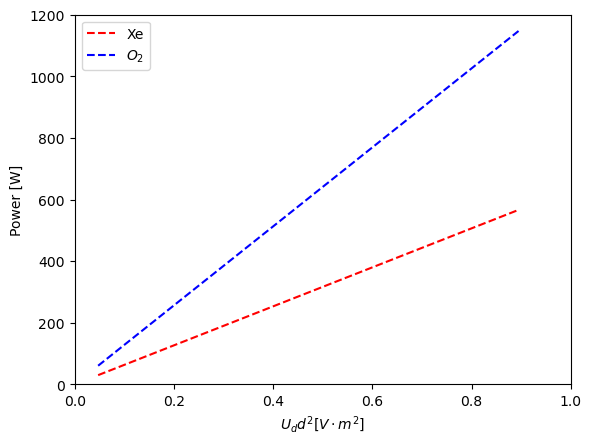

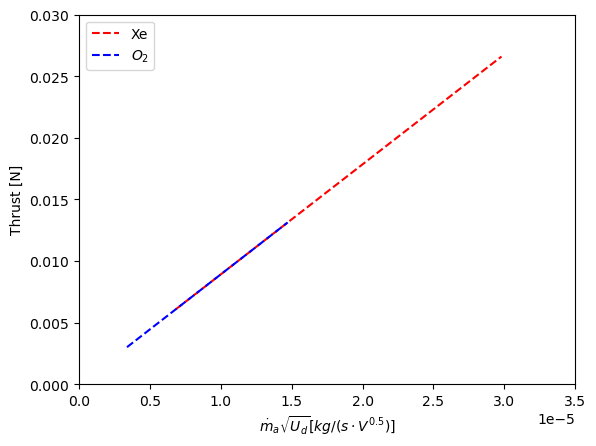

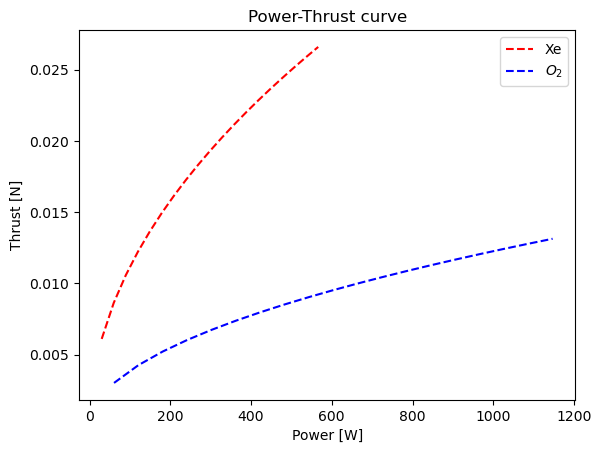

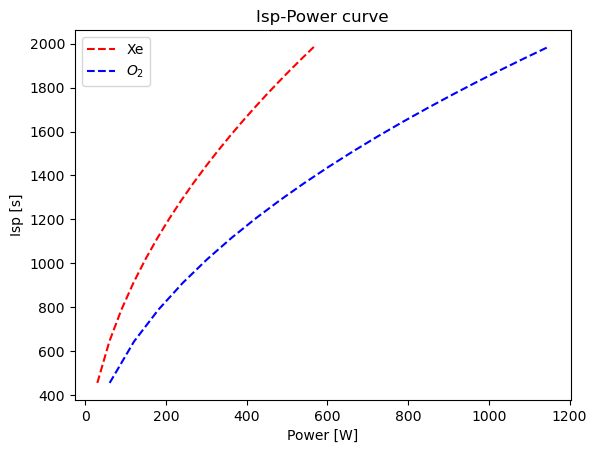

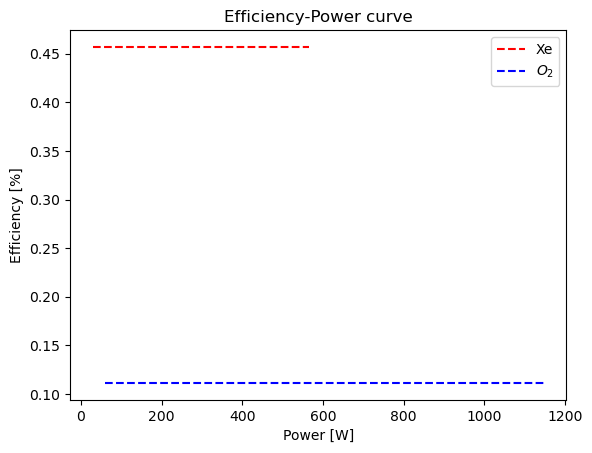

In [6]:
# fixed d, use different Voltage to draw diagram 1.dot{m}-hd, 2.P-udd^2, 3.T-dot{m} sqrt{U_d}
import matplotlib.pyplot as plt

P_xe=[[],[]]
T_xe=[[],[]]

P_o2=[[],[]]
T_o2=[[],[]]

Isp_xe=[]
Isp_o2=[]

eta_xe=[]
eta_o2=[]

Ud=np.arange(25,500,25)


# fixed mass flow rate 
def calculator(V,d,C_h,C_m,C_P,C_T,P,T,Isp,eta):
    h=C_h*d
    dot_m=C_m*h*d
    for U in V:
        P_cal=C_P*U*(d**2)
        P[0].append(U*(d**2))
        P[1].append(P_cal)

        T_cal=C_T*dot_m*np.sqrt(U)
        T[0].append(dot_m*np.sqrt(U))
        T[1].append(T_cal)

        Isp_cal=T_cal/(dot_m*g_0)
        Isp.append(Isp_cal)

        eta_cal=(T_cal**2)/(2*dot_m*P_cal)
        eta.append(eta_cal)

    return P,T,Isp,eta
    
P_xe,T_xe,Isp_xe,eta_xe=calculator(Ud,d,C_h_xe,C_m_xe,C_P_xe,C_T_xe,P_xe,T_xe,Isp_xe,eta_xe)
P_o2,T_o2,Isp_o2,eta_o2=calculator(Ud,d,C_h_o2,C_m_o2,C_P_o2,C_T_o2,P_o2,T_o2,Isp_o2,eta_o2)


# Power slope
plt.plot(P_xe[0][:], P_xe[1][:], 'r--',label='Xe')
plt.plot(P_o2[0][:], P_o2[1][:], 'b--',label='$O_2$')

plt.xlabel('$U_d d^2 [V\cdot m^2]$')
plt.ylabel('Power [W]')

plt.xlim(0.,1.)
plt.ylim(0.,1200.)

plt.legend()
plt.show()


#Thrust slope
plt.plot(T_xe[0][:], T_xe[1][:], 'r--',label='Xe')
plt.plot(T_o2[0][:], T_o2[1][:], 'b--',label='$O_2$')

plt.xlabel('$\dot{m}_a \sqrt{U_d} [kg/(s \cdot V^{0.5}) ]$')
plt.ylabel('Thrust [N]')

plt.xlim(0.,3.5*1e-5)
plt.ylim(0.,0.03)

plt.legend()
plt.show()



#Thrust-Power slope
plt.plot(P_xe[1][0:], T_xe[1][0:], 'r--',label='Xe')
plt.plot(P_o2[1][0:], T_o2[1][0:], 'b--',label='$O_2$')

plt.xlabel('Power [W]')
plt.ylabel('Thrust [N]')

plt.title('Power-Thrust curve')

plt.legend()
plt.show()


#Isp-Power curve
plt.plot(P_xe[1][0:], Isp_xe, 'r--',label='Xe')
plt.plot(P_o2[1][0:], Isp_o2, 'b--',label='$O_2$')

plt.xlabel('Power [W]')
plt.ylabel('Isp [s]')

plt.title('Isp-Power curve')

plt.legend()
plt.show()


#eta-Power curve
plt.plot(P_xe[1][0:], eta_xe, 'r--',label='Xe')
plt.plot(P_o2[1][0:], eta_o2, 'b--',label='$O_2$')

plt.xlabel('Power [W]')
plt.ylabel('Efficiency [%]')

plt.title('Efficiency-Power curve')

plt.legend()
plt.show()


#### Method 2-1: Release the correlation of mass flow rate and plot thrust-power curve
Note:\
In this relation, mass flow rate only influence Thrust, so it won't influence Isp, Anode efficiency will remain constant but with different value

#### Given Parameter
Diameter: $d$\
Discharge voltage: $U_d$\
Mass flow rate: $\dot{m}_a$

#### Steps
1. set up a the range of U_d
2. set up a reasonable mass flow rate
3. calculate channel width
4. optain the anode power and thrust

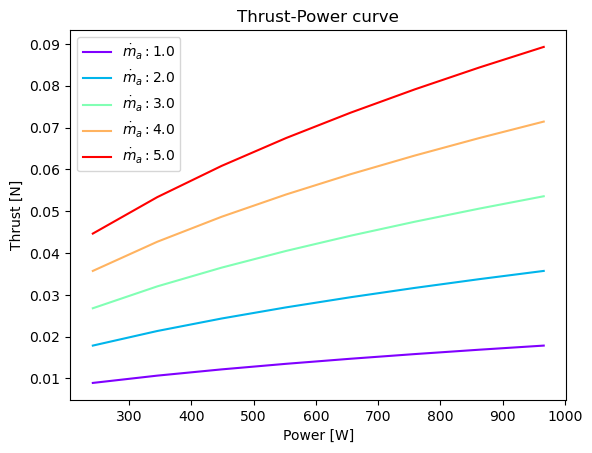

In [7]:
#coefficient setup
from matplotlib.pyplot import cm

dot_m_range=np.linspace(1,5,5)  # mass flow rate range  
dot_m_range=dot_m_range*1e-6        # correct the unit to  [kg/s]

Ud_range=np.linspace(100,400,8)

# data storage
P_range=np.empty([len(dot_m_range), len(Ud_range)], dtype=float)
T_range=np.empty([len(dot_m_range), len(Ud_range)], dtype=float)


def calculator_v2(V,d,dot_m,C_P,C_T,P,T):
    for id_mfr, mfr in enumerate(dot_m):
        for idU, U in enumerate(V):
            P_cal=C_P*U*(d**2)
            P[id_mfr][idU]=P_cal
            
            T_cal=C_T*mfr*np.sqrt(U)
            T[id_mfr][idU]=T_cal

    return P,T

P_range,T_range=calculator_v2(Ud_range,d,dot_m_range,C_P_o2,C_T_o2,P_range,T_range)

#print(P_range)
#print(T_range)


color = iter(cm.rainbow(np.linspace(0, 1, len(dot_m_range))))

for row in range(len(dot_m_range)):
    c=next(color)
    plt.plot(P_range[row][:],T_range[row][:],color=c,label='$\dot{m}_a: $'+str(np.round(dot_m_range[row]*1e6,5)))

plt.xlabel('Power [W]')
plt.ylabel('Thrust [N]')

plt.title('Thrust-Power curve')
plt.legend()

plt.show()
